In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("./train.csv")
x = data_train[data_train.columns[0:6]]
y = data_train[data_train.columns[6]]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

x_train = x_train.to_numpy().reshape(-1, 6)
x_val = x_val.to_numpy().reshape(-1, 6)
x_test = pd.read_csv("./test.csv").to_numpy().reshape(-1, 6)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape)

(53028, 6) (17676, 6) (17676, 6)
(53028,) (17676,)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_val_scaled = ss.transform(x_val)
x_test_scaled = ss.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

# print("계수:", lr.coef_)
# print("절편:", lr.intercept_)

print("학습용:", lr.score(x_train_scaled, y_train))
print("검증용:", lr.score(x_val_scaled, y_val))

학습용: 0.9556649317341782
검증용: 0.9543448744059742


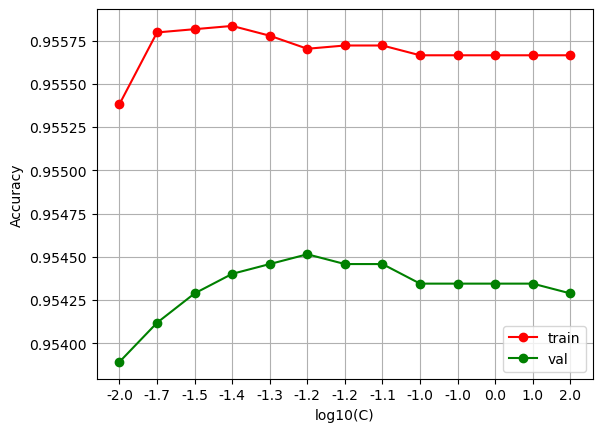

In [4]:
C_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1, 10, 100]

score_train = []
score_val = []
for C in C_list:
    lr = LogisticRegression(C=C)
    lr.fit(x_train_scaled, y_train)
    score_train.append(lr.score(x_train_scaled, y_train))
    score_val.append(lr.score(x_val_scaled, y_val))
    
    
plt.figure()
plt.plot(range(len(C_list)), score_train, marker='o', color='r', label="train")
plt.plot(range(len(C_list)), score_val, marker='o', color='g', label="val")
plt.legend()
plt.xlabel("log10(C)")
plt.ylabel("Accuracy")
plt.xticks(range(len(C_list)), np.round(np.log10(C_list), 1))
plt.grid()
plt.show()

In [5]:
lr = LogisticRegression(C=0.09)  # 솜솜이보다 낮은 정확도를 만들기 위해서 최적이 아닌 값으로 설정! :)
lr.fit(x_train_scaled, y_train)

print("학습용:", lr.score(x_train_scaled, y_train))
print("검증용:", lr.score(x_val_scaled, y_val))

학습용: 0.9556649317341782
검증용: 0.9543448744059742
